In [1]:
import pandas as pd
import jieba
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
df1 = pd.read_excel('南方日报_微博用户.xlsx')
df2 = pd.read_excel('南方日报_微博用户_全文.xlsx')

In [5]:
df1.columns

Index(['content', 'full_text_url', 'repost_source_name', 'repost_source_url',
       'repost_reason', 'like_count', 'repost_count', 'comment_count', 'time'],
      dtype='object')

In [6]:
df2.columns

Index(['fulltext', 'full_text_url'], dtype='object')

In [7]:
df = pd.merge(df1, df2, on='full_text_url', how='left')


In [10]:
# 合并 content 和 fulltext 列，优先使用 fulltext 的值，如果为空则使用 content 的值
df['merged_text'] = df['fulltext'].fillna(df['content'])

In [13]:
#导出数据
# df.to_excel('南方日报_微博用户_合并.xlsx',index=False)

# 查看数据

In [12]:
df.head(2)

,content,full_text_url,repost_source_name,repost_source_url,repost_reason,like_count,repost_count,comment_count,time,fulltext,merged_text
0,【#专家提醒黑色染发剂最危险#】年过50的李女士近十年频繁染发，近段时间，李女士因身体疲乏、...,/comment/P6H5PikLZ?ckAll=1,NaN,NaN,NaN,5,0,1,17分钟前,:【#专家提醒黑色染发剂最危险#】年过50的李女士近十年频繁染发，近段时间，李女士因身体疲乏...,:【#专家提醒黑色染发剂最危险#】年过50的李女士近十年频繁染发，近段时间，李女士因身体疲乏...
1,#大疆拟建250米超高层总部大楼#【大疆拟深圳湾超总拿地，建250米+超高层总部大楼！】12...,/comment/P6GVqANQJ?ckAll=1,NaN,NaN,原图,2,0,0,42分钟前,:#大疆拟建250米超高层总部大楼#【大疆拟深圳湾超总拿地，建250米+超高层总部大楼！】1...,:#大疆拟建250米超高层总部大楼#【大疆拟深圳湾超总拿地，建250米+超高层总部大楼！】1...


# 排序：转发量最高的10条微博

In [15]:
df.sort_values("repost_count", ascending = False)[["content","repost_count","time"]].head(10)

,content,repost_count,time
1925,#鹿晗工作室在线找人##鹿晗领衔的音乐节如何带火佛山#【两天吸引超7万乐迷，鹿晗领衔的gap...,4404,11月26日 20:02
4526,#全红婵喜提新车#【全红婵谢思埸等奥运冠军，获赠新车！】#全红婵[超话]#\n9月29日，由...,3612,09月29日 19:25
3869,【#周深一开口谭盾眼泪止不住了#】 #周深献唱大湾区文化艺术节#\n10月19日晚，作为第四...,3515,10月20日 10:15
1622,#陈小春看到梅艳芳的身影哭了#【#22岁陈小春曾给26岁梅艳芳伴舞# 】\n在第一期声生不息...,2439,12月01日 20:48
2218,【#太阳星辰内地与Netflix同时开播#】#陈伟霆新剧是跨时空追凶设定#\n罪案类剧集爱好...,2110,11月21日 21:40
2231,【#闫妮说微醺不是我的常态#】#闫妮蒋欣即兴发挥演绎动人姐妹情#\n在《小巷人家》中，#闫妮...,2020,11月21日 19:00
2221,【#胖东来给员工提要求为何公众不买账#】\n近日，胖东来创始人于东来在社交媒体连发数条动态，...,1427,11月21日 20:51
3544,#生育补贴##直面不想生不敢生不能生#【直面“不想生”“不敢生”“不能生”，推动生育友好】\...,1317,10月29日 21:32
2230,【#闫妮蒋欣即兴发挥演绎动人姐妹情#】\n在《小巷人家》中，黄玲与宋莹的神仙友谊也让观众羡慕...,1314,11月21日 19:11
3878,#四城乐团奏响声音版丝绸之路##周深献唱大湾区文化艺术节#\n【谭盾新作《声音河流》香港首演...,1220,10月19日 22:20


# 转发频数分析

In [16]:
# 非转发微博数量
df['repost_source_name'].isna().sum()

4463

In [17]:
# 原创微博比例
df['repost_source_name'].isna().sum()/len(df)

0.9124923328562666

In [18]:
# 转发来源分析
df.value_counts("repost_source_name")

repost_source_name
央视新闻         178
人民日报          51
新华社           28
央视网           22
南方日报          20
CCTV国际时讯       9
总台环球资讯         9
央视军事           9
生命时报           7
央视财经           7
中国新闻网          7
新华网            5
北京日报           5
人民网            4
央视网快看          4
九派新闻           3
参考消息           3
央广网            3
扬子晚报           3
北京时间           3
封面新闻           2
中国军号           2
央视一套           2
观察者网           2
潇湘晨报           2
新京报            2
红星新闻           2
环球时报           2
环球网            2
CCTV焦点访谈       1
法治日报           1
海客新闻           1
厦门广电           1
电影频道融媒体中心      1
梨视频            1
荔枝新闻           1
蓝鲸新闻           1
贝壳财经           1
钱江晚报           1
闪电新闻           1
正观新闻           1
人民视频           1
最高人民检察院        1
CCTV法治在线       1
咪咕体育           1
南方农村报          1
中国电影报道         1
北京晚报           1
央视社会与法         1
中国新闻周刊         1
平安固始           1
时间视频           1
广东发布           1
中国奥林匹克委员会      1
中新文娱           1
新京报我们视频        1
新华日报           1
中工网         

# 传播效果统计

In [19]:
# 点赞数描述性统计结果
df["like_count"].describe()

count     4891.000000
mean       308.393989
std       2288.837439
min          0.000000
25%          3.000000
50%          7.000000
75%         57.000000
max      80250.000000
Name: like_count, dtype: float64

In [20]:
# 转发数描述性统计结果
df["repost_count"].describe()

count    4891.000000
mean       15.928644
std       132.542492
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      4404.000000
Name: repost_count, dtype: float64

In [21]:
# 评论数描述性统计结果
df["comment_count"].describe()

count    4891.000000
mean        9.345533
std        61.794084
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      2124.000000
Name: comment_count, dtype: float64

# 词云分析

In [30]:
#加载外部分词字典
jieba.load_userdict("userdict.txt")

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

In [31]:
# 对DataFrame的'content'列应用中文分词
df['content_segmented'] = df['content'].apply(chinese_segmentation)

In [32]:
df['content_segmented']

0       【 # 专家 提醒 黑色 染发剂 最 危险 # 】 年 过 50 的 李女士 近十年 频繁 ...
1       # 大疆 拟建 250 米 超高层 总部 大楼 # 【 大疆拟 深圳湾 超总拿地 ， 建 2...
2       # 鱿鱼 游戏 3 明年 开播 # 【 小 调查 】 《 鱿鱼 游戏 》 第二季 今日 上线...
3       【 深大乒超 俱乐部 新 赛季 启航 ！ # 孙颖莎称 相信 能 打 好 今年 最后 一战 ...
4       # 我 的 2024 游戏 总结 # 【 小 调查 】 今年 你 最 经常 玩 的 游戏 是...
                              ...                        
4886    # 广州 美诚 工厂 仍 在 正常 生产 经营 # \n 【 # 实探 广州 美诚 生产线 ...
4887    # 该 管管 疯狂 的 直播间 主播 了 # 【 是 时候 管管 “ 疯狂 ” 的 主播 了...
4888    # 南方 ＋ 今日 热 搜 # 【 三只 羊有 没 虚假 营销 才 是 众怒 的 根源 】 ...
4889    # 三只 羊 是否 虚假 营销 才 是 众怒 的 根源 # \n 【 评论 ｜ “ 美诚 月...
4890    【 # 大湾区 新 地标 广州 之窗 建成 # ： 可直望 广州市 中心 “ 三件套 ” 地...
Name: content_segmented, Length: 4891, dtype: object

In [33]:
# 对所有'content_segmented'文本进行拼接
all_content = " ".join(df['content_segmented'])

In [34]:
all_content

'【 # 专家 提醒 黑色 染发剂 最 危险 # 】 年 过 50 的 李女士 近十年 频繁 染发 ， 近 段时间 ， 李女士 因 身体 疲乏 、 皮肤 暗淡 而 到 了 医院 就诊 ， 结果 被 查出 肝硬化 中晚期 。 医生 分析 ， 李女士 的 肝硬化 与 长期 频繁 染发 有关 。 \n \n 来自 美国 相关 机构 的 研究 发现 ， 使用 永久 染发剂 与 卵巢 病 、 皮肤癌 、 淋巴瘤 乳腺癌 等 癌症 风险 增加 有关 。 黑色 染 ... 全文 # 大疆 拟建 250 米 超高层 总部 大楼 # 【 大疆拟 深圳湾 超总拿地 ， 建 250 米 + 超高层 总部 大楼 ！ 】 12 月 25 日 ， 深圳市政府 官网 发布 《 智能 航空 系统 产业 生态 全球 总部 项目 遴选 方案 》 显示 ， 宗 地 位于 深圳湾 超级 总部 基地 DU01 - 02 地块 ， 用地 面积 15658 平方米 ， 总 建筑面积 188000 ㎡ 。 \n \n 目前 意向 用地 单位 为 深圳市 大疆 创新 科技 有限 ... 全文 # 鱿鱼 游戏 3 明年 开播 # 【 小 调查 】 《 鱿鱼 游戏 》 第二季 今日 上线 ， 第一季 的 《 鱿鱼 游戏 》 你 看过 吗 ？   你 看过 第一季 的 《 鱿鱼 游戏 》 吗 ？ 【 深大乒超 俱乐部 新 赛季 启航 ！ # 孙颖莎称 相信 能 打 好 今年 最后 一战 # 】 12 月 26 日 ， “ 深圳大学 乒超 俱乐部 代表队 2024 赛季 启航 仪式 ” 在 深圳市 南山区 蛇口 文体 中心 举行 ， 深圳大学 乒超 俱乐部 队员 孙颖莎 、 覃予 萱 、 吴咏琳 出席 活动 。 \n \n # 孙颖莎 平常 用 聊天 式 沟通 准备 好 比赛 # 对于 12 月 30 日 将 于 上海 举行 的 2024 年 中国 乒超联 ... 全文 # 我 的 2024 游戏 总结 # 【 小 调查 】 今年 你 最 经常 玩 的 游戏 是 ？   今年 你 最 经常 玩 的 游戏 是 ？ 【 # 厨师 上 厕所 猝死 店家 不服 工伤 认定 #   法院 ： 劳动者 “ 上 厕所 ”   应 受到 法律 的 保护 】 近日 ， 清远市 中级 人民法院 公布 了 一则 案例 ， 黄某 是 某 烧烤店 

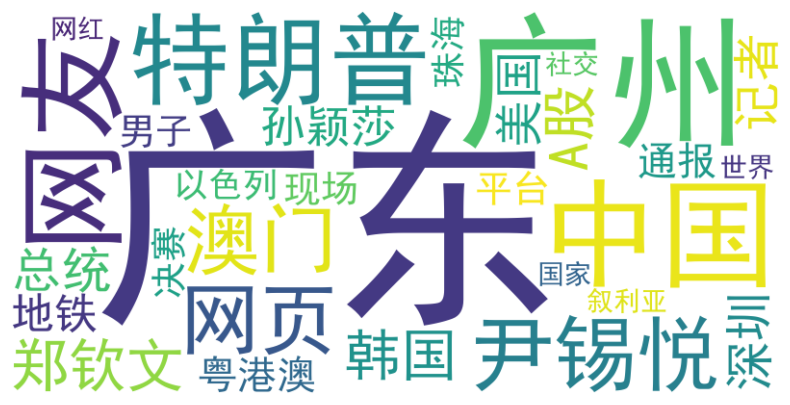

In [36]:
# 选择需要分析的字段
# 创建词云，并排除停用词
def generate_wordcloud(text):
    # 从外部文件读取停用词列表
    jieba.analyse.set_stop_words("stopwords.txt")
    
    # 使用 jieba.analyse.extract_tags 提取关键词
    keywords = jieba.analyse.extract_tags(text, topK=50, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')：表示仅考虑名词（'n'）、人名（'nr'）、地名（'ns'）等词性的词语作为关键词。这是通过词性标注来筛选关键词的一种方式。

    # 构建关键词和权重的字典
    keywords_dict = {word: weight for word, weight in keywords}

    # 创建词云
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=30, 
        collocations=False, 
        font_path= r'C:\Windows\Fonts\simhei.ttf',  # 使用支持中文的字体（黑体）
    ).generate_from_frequencies(keywords_dict)
    
    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 生成并显示词云
generate_wordcloud(all_content)

# 其实还可以做很多分析......

- **新闻的区域**：哪些地区更可能被报道？
- **新闻的主题**：社会新闻/体育新闻/娱乐新闻/...
- **新闻的情感倾向**：正面/负面/中性